# Gauss Blur

## Using CPU

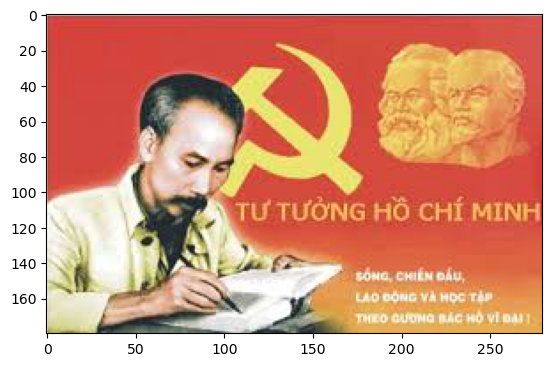

(180, 280, 3)


In [44]:
import matplotlib.pyplot as plt
import math
import time

hostInp=plt.imread("../images/image3.jpg")
plt.imshow(hostInp)
plt.show()

(H,W,C) = hostInp.shape
print(hostInp.shape)
kernel_size = (7,7)

x_step = H - kernel_size[0] + 1
y_step = W - kernel_size[1] + 1


for i in range(x_step):
    for j in range(y_step):
        pass







['0.00492', '0.00920', '0.01338', '0.01516', '0.01338', '0.00920', '0.00492']
['0.00920', '0.01718', '0.02500', '0.02833', '0.02500', '0.01718', '0.00920']
['0.01338', '0.02500', '0.03637', '0.04121', '0.03637', '0.02500', '0.01338']
['0.01516', '0.02833', '0.04121', '0.04670', '0.04121', '0.02833', '0.01516']
['0.01338', '0.02500', '0.03637', '0.04121', '0.03637', '0.02500', '0.01338']
['0.00920', '0.01718', '0.02500', '0.02833', '0.02500', '0.01718', '0.00920']
['0.00492', '0.00920', '0.01338', '0.01516', '0.01338', '0.00920', '0.00492']


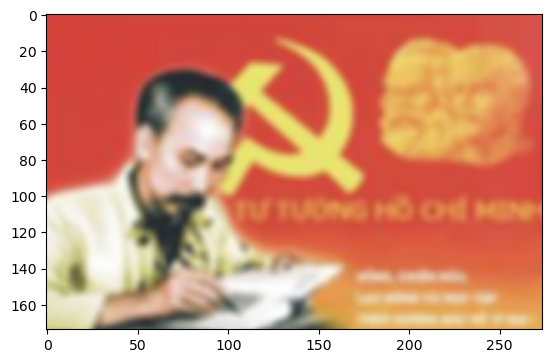

In [45]:

def gauss_kernal():
    sigma = 2
    sumv = 0
    kernal = []
    for i in range(-3 , 4 ):
        row = []
        for j in range(-3 , 4 ):
            g = (1 / (2 * math.pi * sigma ** 2)) * math.exp(-(i**2 + j**2) / (2 * sigma ** 2))
            row.append(g)
            sumv += g
        kernal.append(row)

    for i in range(7):
        for j in range(7):
            kernal[i][j] /= sumv
    return kernal

output = [[[0 for _ in range(C)] for _ in range(y_step)] for _ in range(x_step)]
k = gauss_kernal()
for row in k:
    print([f"{val:.5f}" for val in row])

for h in range(x_step):
    for w in range(y_step):
            for c in range(C):  
                w_sum = 0
                for i in range(7):
                    for j in range(7):
                        w_sum += hostInp[h + i][w + j][c] * k[i][j]

                output[h][w][c] = int(w_sum)

plt.imshow(output)
plt.show()

## Using GPU

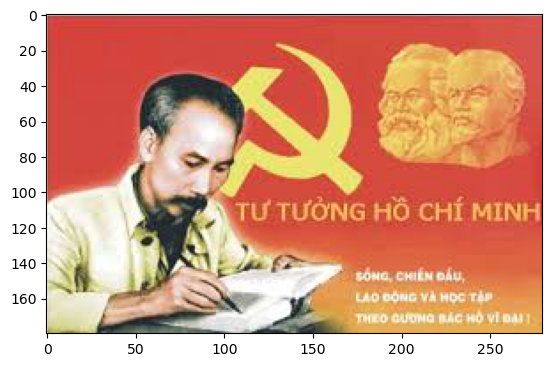

(180, 280, 3)


CudaAPIError: [700] Call to cuMemAlloc results in UNKNOWN_CUDA_ERROR

In [53]:
import numba
from numba import cuda
import numpy as np
import matplotlib.pyplot as plt
import time

hostInp=plt.imread("../images/image3.jpg")
plt.imshow(hostInp)
plt.show()

(H,W,C) = hostInp.shape
print((H,W,C))


devOut=cuda.device_array((H, W, C), np.uint8)

hostOut=np.zeros((H,W,C),np.uint8)

devInp=cuda.to_device(hostInp)

k = gauss_kernal()

d_k = cuda.to_device(np.array(k))

@cuda.jit
def Gauss(src, dst, k):
    x, y = cuda.grid(2)
    for c in range(3):  
        w_sum = 0
        for i in range(7):
            for j in range(7):
                w_sum += src[x + i - 3][y + j - 3][c] * k[i][j]

        dst[x][y][c] = int(w_sum)


block_sizes = (8, 8)
gridSizeX = (H + block_sizes[0] - 1) // block_sizes[0]
gridSizeY = (W + block_sizes[1] - 1) // block_sizes[1]



gridSize = (gridSizeX, gridSizeY)
cuda.synchronize()
t1 = time.time()
Gauss[gridSize, block_sizes ](devInp, devOut, d_k)

cuda.synchronize()
t2 = time.time()

hostOut = devOut.copy_to_host()
print("time", t2 - t1)

plt.imshow(hostOut)
plt.show()

